In [9]:
"""
使用DipoleMagDir类估算磁化方向
"""
# 3rd imports
import numpy as np
import matplotlib.pyplot as plt
# local imports
from geoist import gridder
from geoist.inversion import geometry
from geoist.pfm.giutils import ang2vec, contaminate
from geoist.pfm import sphere
from geoist.pfm.magdir import DipoleMagDir
from geoist.vis import giplt

In [10]:
# 磁异常计算及添加噪声
inc, dec = -10.0, -15.0  # 磁倾角、磁偏角
model = [geometry.Sphere(3000, 3000, 1000, 1000,
                       {'magnetization': ang2vec(6.0, -20.0, -10.0)}),
         geometry.Sphere(7000, 7000, 1000, 1000,
                       {'magnetization': ang2vec(10.0, 3.0, -67.0)})]
area = (0, 10000, 0, 10000)
x, y, z = gridder.scatter(area, 1000, z=-150, seed=0)
tf = contaminate(sphere.tf(x, y, z, model, inc, dec), 5.0, seed=0)

# 偶极子中心
centers = [[3000, 3000, 1000], [7000, 7000, 1000]]

In [11]:
# 磁矢量估计
solver = DipoleMagDir(x, y, z, tf, inc, dec, centers).fit()

In [12]:
# 输出估计和真实的磁偶极子分量，磁倾角，磁偏角
print('Estimated magnetization (intensity, inclination, declination)')
for e in solver.estimate_:
    print(e)

Estimated magnetization (intensity, inclination, declination)
[2514.452175001508, -20.015790016830422, -10.036363448371256]
[4181.363570901713, 3.037325309706844, -66.96549442175751]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


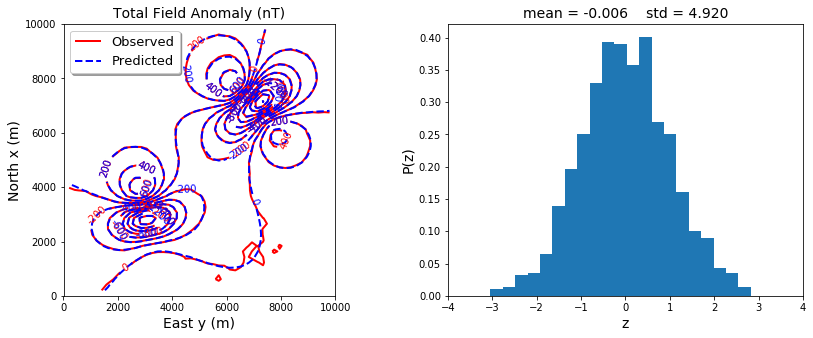

In [14]:
# 拟合及残差图
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title("Total Field Anomaly (nT)", fontsize=14)
plt.axis('scaled')
nlevels = giplt.contour(y, x, tf, (50, 50), 15, interp=True, color='r',
                      label='Observed', linewidth=2.0)
giplt.contour(y, x, solver.predicted(), (50, 50), nlevels, interp=True,
            color='b', label='Predicted', style='dashed', linewidth=2.0)
plt.legend(loc='upper left', shadow=True, prop={'size': 13})
plt.xlabel('East y (m)', fontsize=14)
plt.ylabel('North x (m)', fontsize=14)
plt.subplot(1, 2, 2)
residuals_mean = np.mean(solver.residuals())
residuals_std = np.std(solver.residuals())
# 每个量都是减均值得到残差
# 残差除以标准差得到差异
s = (solver.residuals() - residuals_mean) / residuals_std
plt.hist(s, bins=21, range=None, normed=True, weights=None,
         cumulative=False, bottom=None, histtype='bar', align='mid',
         orientation='vertical', rwidth=None, log=False,
         color=None, label=None)
plt.xlim(-4, 4)
plt.title("mean = %.3f    std = %.3f" % (residuals_mean, residuals_std),
          fontsize=14)
plt.ylabel("P(z)", fontsize=14)
plt.xlabel("z", fontsize=14)
plt.show()